In [14]:
import pandas as pd
import sklearn as sk
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
boston = fetch_california_housing()

x = boston.data
y = boston.target
columns = boston.feature_names#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<AxesSubplot:xlabel='HouseAge'>

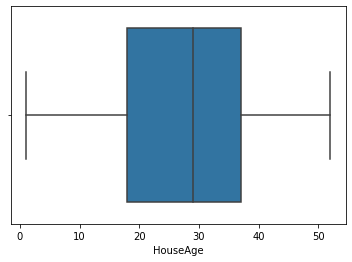

In [12]:
import seaborn as sns
sns.boxplot(x=boston_df['HouseAge'])

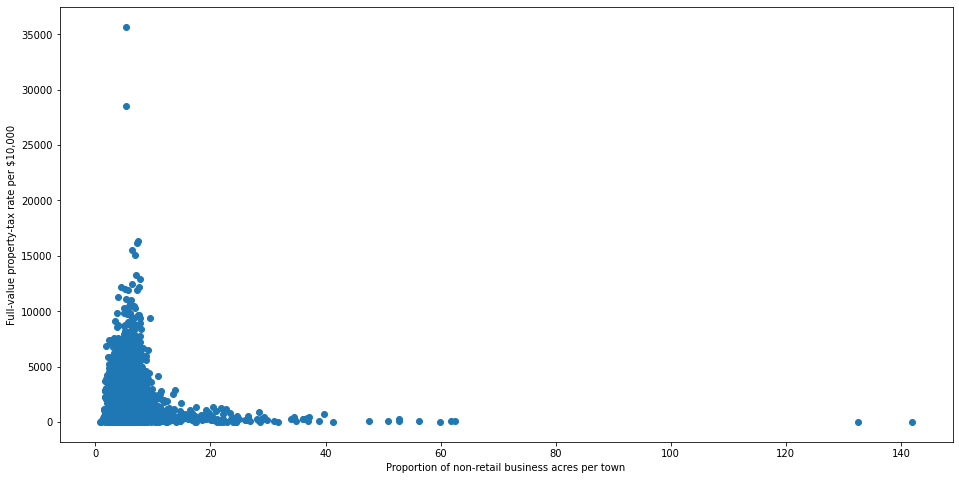

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['AveRooms'], boston_df['Population'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [28]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
# print(z)
threshold = 3
# print(np.where(z > threshold))
boston_df_o = boston_df[(z < 3).all(axis=1)]
boston_df.shape
boston_df_o.shape



(19794, 8)

In [23]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

print(boston_df< (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))



MedInc          2.179850
HouseAge       19.000000
AveRooms        1.611665
AveBedrms       0.093447
Population    938.000000
AveOccup        0.852520
Latitude        3.780000
Longitude       3.790000
dtype: float64
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     Fals

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]